## Using Fast Fourier Transform to Denoise Data

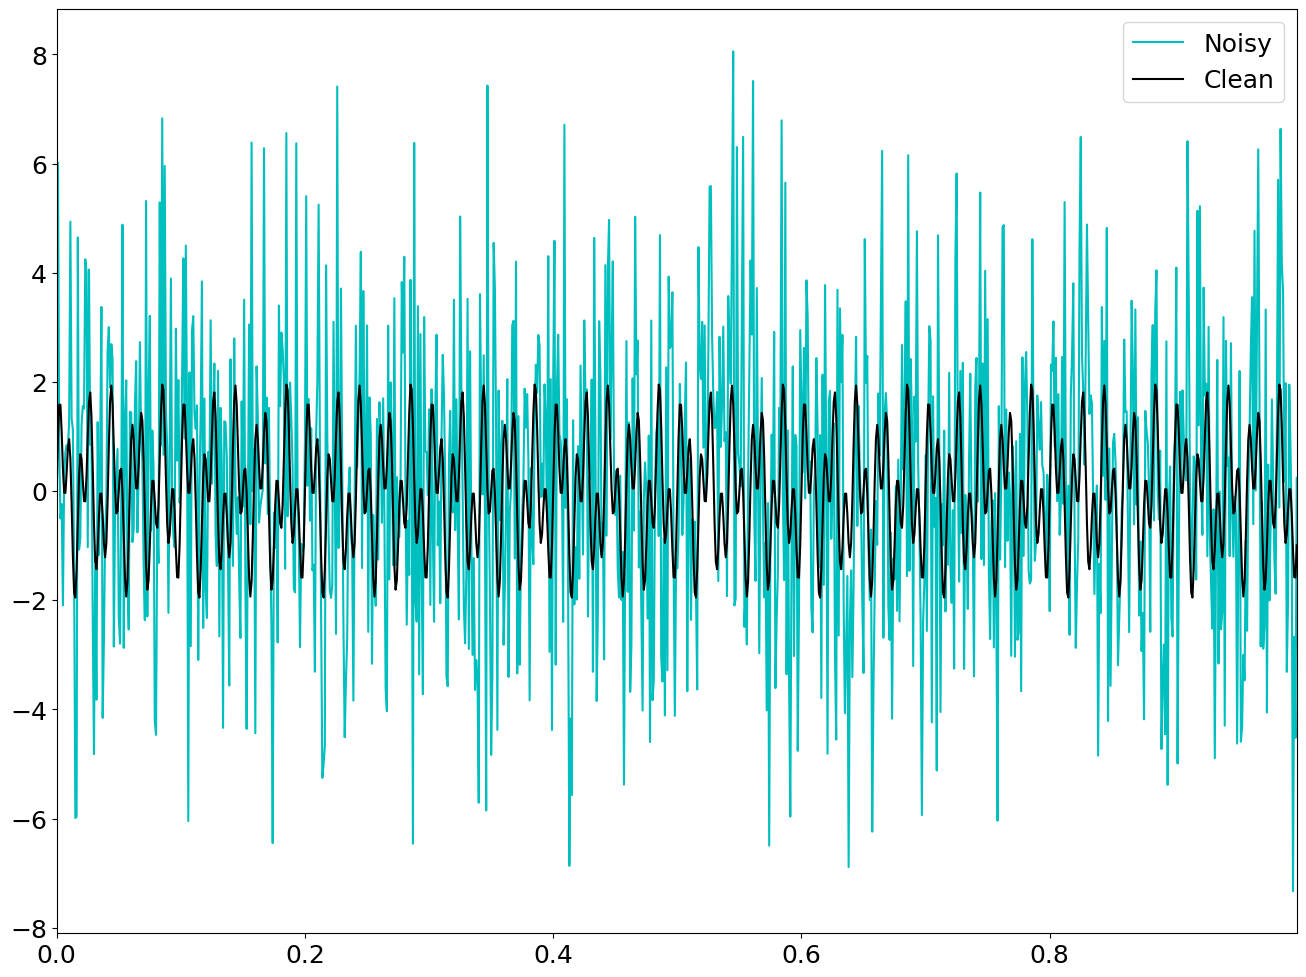

In [44]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies

dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t)) # Add some noise


# Visualise the clean signal

plt.plot(t, f, color = 'c', label = 'Noisy')
plt.plot(t, f_clean, color = 'k', label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()
plt.show()

### Compute the Fast Fourier Trnasform (FFT)

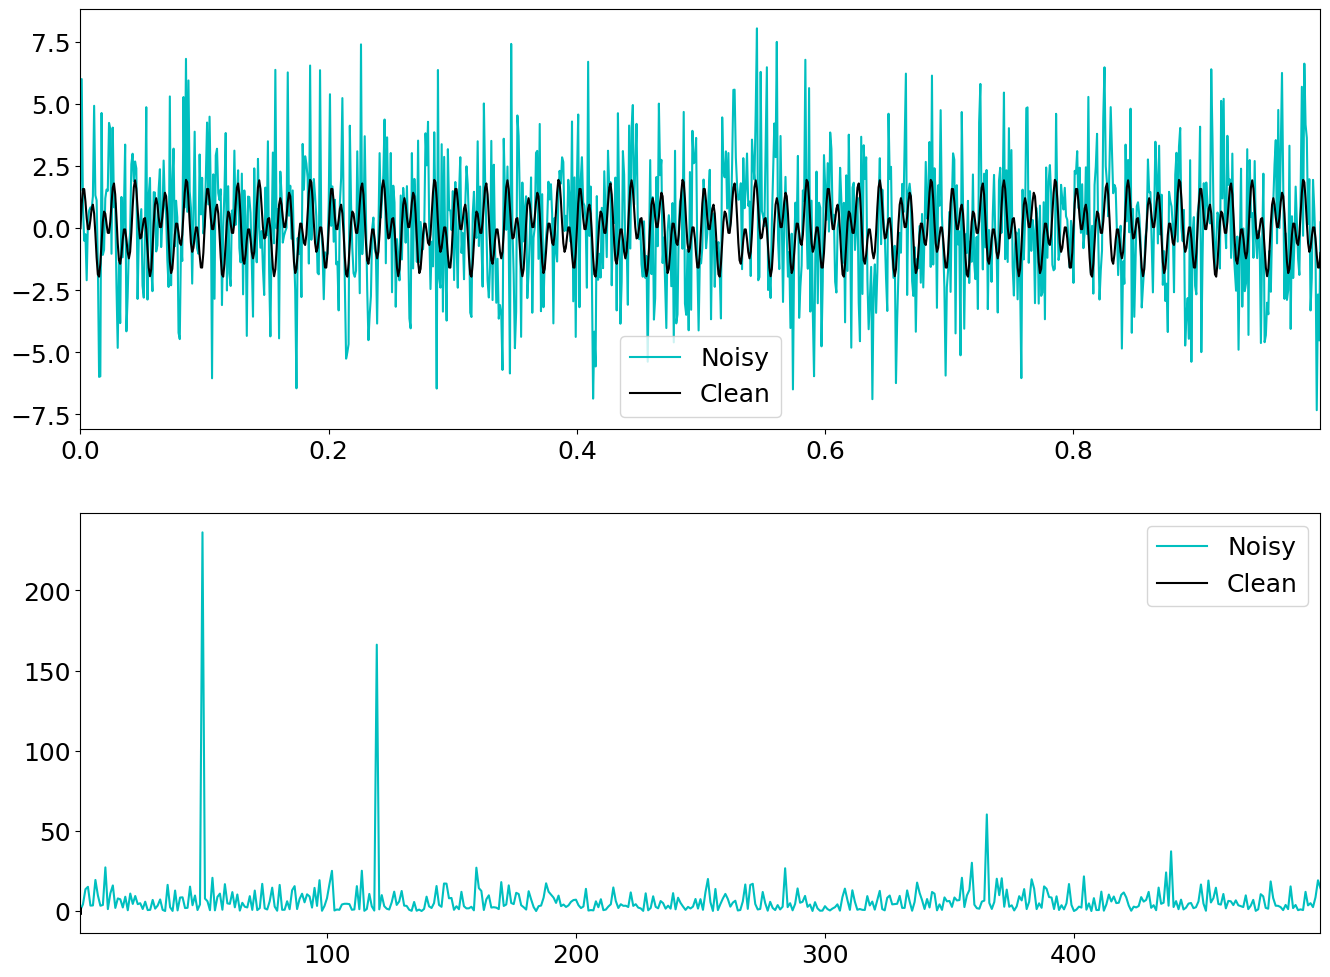

In [57]:

n = len(t)
fhat = np.fft.fft(f, n)                                    # Compute the FFT
PSD = fhat * np.conj(fhat) /n                              # Power spectrum (power per frequency)
freq = (1 / (dt*n)) * np.arange(n)                         # Create x-axis of the frequencies 
L = np.arange(1, np.floor(n/2), dtype = 'int')             # Only plot the first half of the PSD vs FFT

fig, axs = plt.subplots(2, 1)

plt.sca(axs[0])
plt.plot(t,f, color = 'c', label = 'Noisy')
plt.plot(t, f_clean, color = 'k', label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L], color = 'c', label = 'Noisy')
plt.plot(t, f_clean, color = 'k', label = 'Clean')
plt.xlim(L[0], L[-1])
plt.legend()

plt.show()

The result presents a power spectrum density versus frequency plot. The y-axis indicates the power present at each frequency on the x-axis. 
The plot reveals that the signal's power is concentrated primarily at 50 Hz and 120 Hz. 
Consequently, we can filter the data by zeroing out any Fourier coefficients below a certain threshold, while retaining those above it. 
We then perform an inverse Fourier transform to reconstruct the denoised signal. 

In [53]:
# Use the PSD to filter out noise 
indices = PSD > 100                        # Find all the frequencies with large power    
PSDclean = PSD * indices                   # Zero out all others 
fhat = indices * fhat                      # Zero out small Fourier coeff in Y
ffilt = np.fft.ifft(fhat)                  # Invers FFT for filtered time signal 

C:\Users\shsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\shsha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


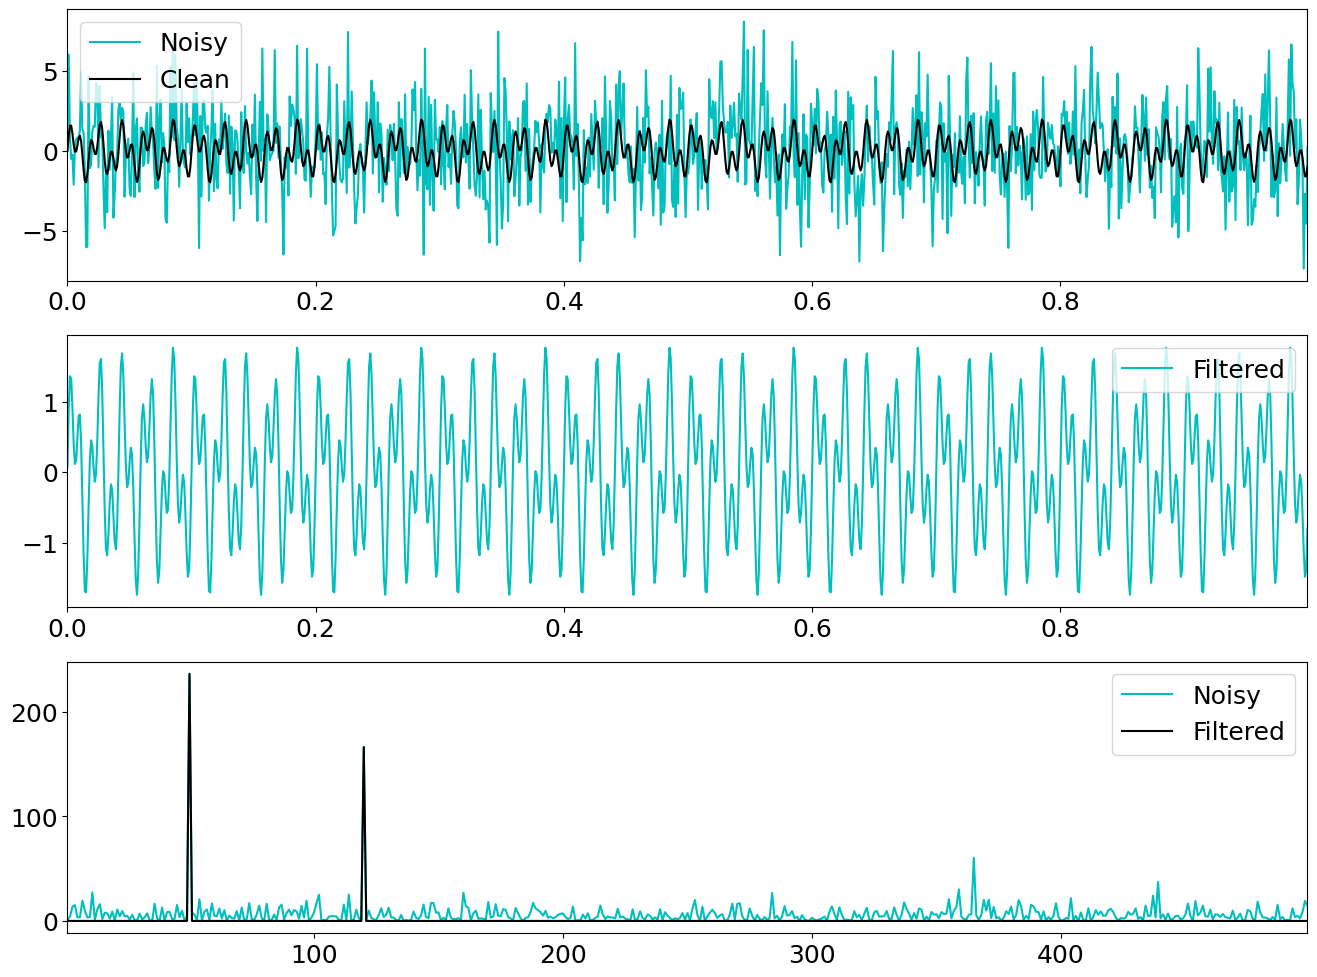

In [58]:
## Plot 

fig, axs = plt.subplots(3, 1)

plt.sca(axs[0])
plt.plot(t,f, color = 'c', label = 'Noisy')
plt.plot(t, f_clean, color = 'k', label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt, color = 'c', label = 'Filtered')
plt.xlim(t[0], t[-1])
plt.legend()


plt.sca(axs[2])
plt.plot(freq[L],PSD[L], color = 'c', label = 'Noisy')
plt.plot(freq[L],PSDclean[L], color = 'k', label = 'Filtered')
plt.xlim(L[0], L[-1])
plt.legend()

plt.show()
